## Import packages

In [31]:
import uproot
import pyjet
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import importlib
import time
import re

from BranchClass import *

import Event_List 
import jet_trimming 
import JSS 

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%config InlineBackend. figure_format = 'retina'

# Combine Images for Each Generator

In [14]:
# # len(jetimage_list)
# # path = "/dicos_ui_home/alanchung/UniversalityDNN/Jet_Images/"
# path = "/home/u5/Universality/Jet_Images/"
# generator = ["W_herwig_ang","W_pythia_def","W_pythia_dip","W_pythia_vin","W_sherpa_def",
#              "QCD_herwig_ang","QCD_pythia_def","QCD_pythia_dip","QCD_pythia_vin","QCD_sherpa_def"]

# for element in generator:
#     jetimages = np.load(path + element + "_1.npz")["arr_0"]
#     for i in range(2,11):  
#         jetimages_tmp = np.load(path + element + "_" + str(i) + ".npz")["arr_0"]
#         jetimages = np.concatenate((jetimages, jetimages_tmp))
        
#     print(element," is finished")
#     np.savez( path + element + ".npz",jetimages)

W_herwig_ang  is finished
W_pythia_def  is finished
W_pythia_dip  is finished
W_pythia_vin  is finished
W_sherpa_def  is finished
QCD_herwig_ang  is finished
QCD_pythia_def  is finished
QCD_pythia_dip  is finished
QCD_pythia_vin  is finished
QCD_sherpa_def  is finished


In [15]:
# HOMEPATH = "/home/u5/Universality/"
# Data_High_Level_Features_path =  HOMEPATH + "Data_High_Level_Features/"
# process = ["herwig_ang_QCD","herwig_ang_W",
#            "pythia_def_QCD","pythia_def_W",
#            "pythia_dip_QCD","pythia_dip_W",
#            "pythia_vin_QCD","pythia_vin_W",
#            "sherpa_def_QCD","sherpa_def_W"
#           ]


# for element in process:
#     print(element)
    
#     total_data = pd.read_csv(Data_High_Level_Features_path + str(element) + "_1.csv")
    
# #     aaa = len(total_data)
    
#     for i in range(2,11):
#         data_tmp = pd.read_csv(Data_High_Level_Features_path + str(element) + "_" + str(i)+".csv")
#         total_data = pd.concat([total_data, data_tmp],ignore_index=True,axis=0,join='inner')
        
# #         aaa += len(data_tmp)
# #     print(aaa)
#     total_data["index"]= np.linspace(0,len(total_data)-1,len(total_data),dtype="int")

#     total_data.to_csv(Data_High_Level_Features_path + str(element) + ".csv",index = 0)

herwig_ang_QCD
herwig_ang_W
pythia_def_QCD
pythia_def_W
pythia_dip_QCD
pythia_dip_W
pythia_vin_QCD
pythia_vin_W
sherpa_def_QCD
sherpa_def_W


# Standardized

In [ ]:
# # Take in a tuple of image lists, normalze and zero zenter all of them.
# def zero_center_and_normalize(image_lists):
#     tmp_av = np.average(image_lists, axis=0)
#     tmp_sd = np.std(image_lists, axis=0)
#     for i, element in enumerate(image_lists):
#         image_lists[i] = np.divide((element - tmp_av), (tmp_sd+1e-5)) #perhaps add some r to temp_sd to suppress noise
#     return image_lists

In [ ]:
# # len(jetimage_list)
# path = "/home/u5/Universality/Jet_Images/"
# generator = ["W_herwig_ang","W_pythia_def","W_pythia_dip","W_pythia_vin","W_sherpa_def",
#              "QCD_herwig_ang","QCD_pythia_def","QCD_pythia_dip","QCD_pythia_vin","QCD_sherpa_def"]

# for element in generator:
#     jetimages = zero_center_and_normalize(np.load(path + element + ".npz")["arr_0"][:156667])
    
#     print(element," is finished")
#     np.savez( path + element + "_zcn.npz",jetimages)

## Read Data

In [ ]:
# path = "/home/u5/Universality/Jet_Images/"
# W = ["W_herwig_ang","W_pythia_def","W_pythia_vin","W_pythia_dip","W_sherpa_def"]
# QCD = [ "QCD_herwig_ang","QCD_pythia_def","QCD_pythia_vin","QCD_pythia_dip","QCD_sherpa_def"]  

# path_csv = "/home/u5/Universality/Data_High_Level_Features/"
# W_csv = ["herwig_ang_W","pythia_def_W","pythia_vin_W","pythia_dip_W","sherpa_def_W"]
# QCD_csv = [ "herwig_ang_QCD","pythia_def_QCD","pythia_vin_QCD","pythia_dip_QCD","sherpa_def_QCD"]

# # W = ["W_sherpa_def"]
# # QCD = ["QCD_sherpa_def"]  

# # W_herwig_ang,W_pythia_def,W_pythia_vin,W_pythia_dip,W_sherpa_def = 0,0,0,0,0
# # QCD_herwig_ang,QCD_pythia_def,QCD_pythia_vin,QCD_pythia_dip,QCD_sherpa_def = 0,0,0,0,0

# W_jet = [0,0,0,0,0]
# QCD_jet = [0,0,0,0,0]


# for i, element in enumerate(W): 
#     for j in range(1,11):
# #     W_jet[i] =  np.load(path + element + ".npz")["arr_0"]
# #     print("# of {}: {}".format(W[i],len(W_jet[i])))
#         print("# of {}: {}".format(W[i],len(np.load(path + element + "_"+str(j)+".npz")["arr_0"]) - \
#                                    len(pd.read_csv(path_csv + W_csv[i] + "_"+str(j)+".csv"))))
    
# for i, element in enumerate(QCD): 
#     for j in range(1,11):
# #     QCD_jet[i] =  np.load(path + element + ".npz")["arr_0"]
# #     print("# of {}: {}".format(QCD[i],len(QCD_jet[i])))
#         print("# of {}: {}".format(QCD[i],len( np.load(path + element + "_"+str(j)+".npz")["arr_0"]) - \
#                                   len(pd.read_csv(path_csv + QCD_csv[i] + "_"+str(j)+".csv"))))


In [ ]:
# path = "/home/u5/Universality/Data_High_Level_Features/"
# W = ["herwig_ang_W","pythia_def_W","pythia_vin_W","pythia_dip_W","sherpa_def_W"]
# QCD = [ "herwig_ang_QCD","pythia_def_QCD","pythia_vin_QCD","pythia_dip_QCD","sherpa_def_QCD"]  
# # W = ["W_sherpa_def"]
# # QCD = ["QCD_sherpa_def"]  

# # W_herwig_ang,W_pythia_def,W_pythia_vin,W_pythia_dip,W_sherpa_def = 0,0,0,0,0
# # QCD_herwig_ang,QCD_pythia_def,QCD_pythia_vin,QCD_pythia_dip,QCD_sherpa_def = 0,0,0,0,0

# W_jet = [0,0,0,0,0]
# QCD_jet = [0,0,0,0,0]


# for i, element in enumerate(W): 
#     for j in range(1,11):
# #     W_jet[i] =  np.load(path + element + ".npz")["arr_0"]
# #     print("# of {}: {}".format(W[i],len(W_jet[i])))
#         print("# of {}: {}".format(W[i],len(pd.read_csv(path + element + "_"+str(j)+".csv"))))
    
# for i, element in enumerate(QCD): 
#     for j in range(1,11):
# #     QCD_jet[i] =  np.load(path + element + ".npz")["arr_0"]
# #     print("# of {}: {}".format(QCD[i],len(QCD_jet[i])))
#         print("# of {}: {}".format(QCD[i],len(pd.read_csv(path + element + "_"+str(j)+".csv"))))



In [10]:
datapath = "/home/u5/Data_ML/"

preprocess = "untrimmed"

W = ["W_herwig_ang","W_pythia_def","W_pythia_vin","W_pythia_dip","W_sherpa_def"]
QCD = [ "QCD_herwig_ang","QCD_pythia_def","QCD_pythia_vin","QCD_pythia_dip","QCD_sherpa_def"]  

herwig_ang_train = np.load(datapath + "herwig_ang_train" + "_" + str(preprocess) + ".npz")["arr_0"]
herwig_ang_test = np.load(datapath + "herwig_ang_test" + "_" + str(preprocess) + ".npz")["arr_0"]
herwig_ang_val = np.load(datapath + "herwig_ang_val" + "_" + str(preprocess) + ".npz")["arr_0"]

pythia_def_train = np.load(datapath + "pythia_def_train" + "_" + str(preprocess) + ".npz")["arr_0"]
pythia_def_test = np.load(datapath + "pythia_def_test" + "_" + str(preprocess) + ".npz")["arr_0"]
pythia_def_val = np.load(datapath + "pythia_def_val" + "_" + str(preprocess) + ".npz")["arr_0"]

pythia_vin_train = np.load(datapath + "pythia_vin_train" + "_" + str(preprocess) + ".npz")["arr_0"]
pythia_vin_test = np.load(datapath + "pythia_vin_test" + "_" + str(preprocess) + ".npz")["arr_0"]
pythia_vin_val = np.load(datapath + "pythia_vin_val" + "_" + str(preprocess) + ".npz")["arr_0"]

pythia_dip_train = np.load(datapath + "pythia_dip_train" + "_" + str(preprocess) + ".npz")["arr_0"]
pythia_dip_test = np.load(datapath + "pythia_dip_test" + "_" + str(preprocess) + ".npz")["arr_0"]
pythia_dip_val = np.load(datapath + "pythia_dip_val" + "_" + str(preprocess) + ".npz")["arr_0"]

sherpa_def_train = np.load(datapath + "sherpa_def_train" + "_" + str(preprocess) + ".npz")["arr_0"]
sherpa_def_test = np.load(datapath + "sherpa_def_test" + "_" + str(preprocess) + ".npz")["arr_0"]
sherpa_def_val = np.load(datapath + "sherpa_def_val" + "_" + str(preprocess) + ".npz")["arr_0"]


XTRAIN = [herwig_ang_train,pythia_def_train,
         pythia_vin_train,pythia_dip_train,
         sherpa_def_train]

XVAL = [herwig_ang_val,pythia_def_val,
         pythia_vin_val,pythia_dip_val,
         sherpa_def_val]

XTEST = [herwig_ang_test,pythia_def_test,
         pythia_vin_test,pythia_dip_test,
         sherpa_def_test]

W_jet = [0,0,0,0,0]
QCD_jet = [0,0,0,0,0]


for i, element in enumerate(W):
    W_jet[i] = np.concatenate((XTRAIN[i][:int(len(XTRAIN[i])/2)],XVAL[i][:int(len(XVAL[i])/2)]))
    W_jet[i] = np.concatenate((W_jet[i],XTEST[i][:int(len(XTEST[i])/2)]))
    
for i, element in enumerate(QCD):
    QCD_jet[i] = np.concatenate((XTRAIN[i][:int(len(XTRAIN[i])/2):],XVAL[i][int(len(XVAL[i])/2):]))
    QCD_jet[i] = np.concatenate((QCD_jet[i],XTEST[i][int(len(XTEST[i])/2):]))
    
print("\r")
print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole","Sherpa Default"))
print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("W #",len(W_jet[0]),len(W_jet[1]),len(W_jet[2]),len(W_jet[3]),len(W_jet[4])))
print("{:^8}{:^15}{:^15}{:^15}{:^15}{:^15}".format("QCD #",len(QCD_jet[0]),len(QCD_jet[1]),len(QCD_jet[2]),len(QCD_jet[3]),len(QCD_jet[4])))



        Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole Sherpa Default 
  W #        63263          63263          63263          63263          63263     
 QCD #       63263          63263          63263          63263          63263     


In [14]:
ticks_1 = time.time()



Wjet = [W_jet[0],(W_jet[0]-W_jet[1])/(np.std(np.concatenate((np.array(W_jet[0]),np.array(W_jet[1]))), axis=0)+1e-5),
       W_jet[1],(W_jet[1]-W_jet[1]),
       W_jet[2],(W_jet[2]-W_jet[1])/(np.std(np.concatenate((np.array(W_jet[2]),np.array(W_jet[1]))), axis=0)+1e-5),
       W_jet[3],(W_jet[3]-W_jet[1])/(np.std(np.concatenate((np.array(W_jet[3]),np.array(W_jet[1]))), axis=0)+1e-5),
       W_jet[4],(W_jet[4]-W_jet[1])/(np.std(np.concatenate((np.array(W_jet[4]),np.array(W_jet[1]))), axis=0)+1e-5)
      ]

ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))



Time Cost : 0.4356 min


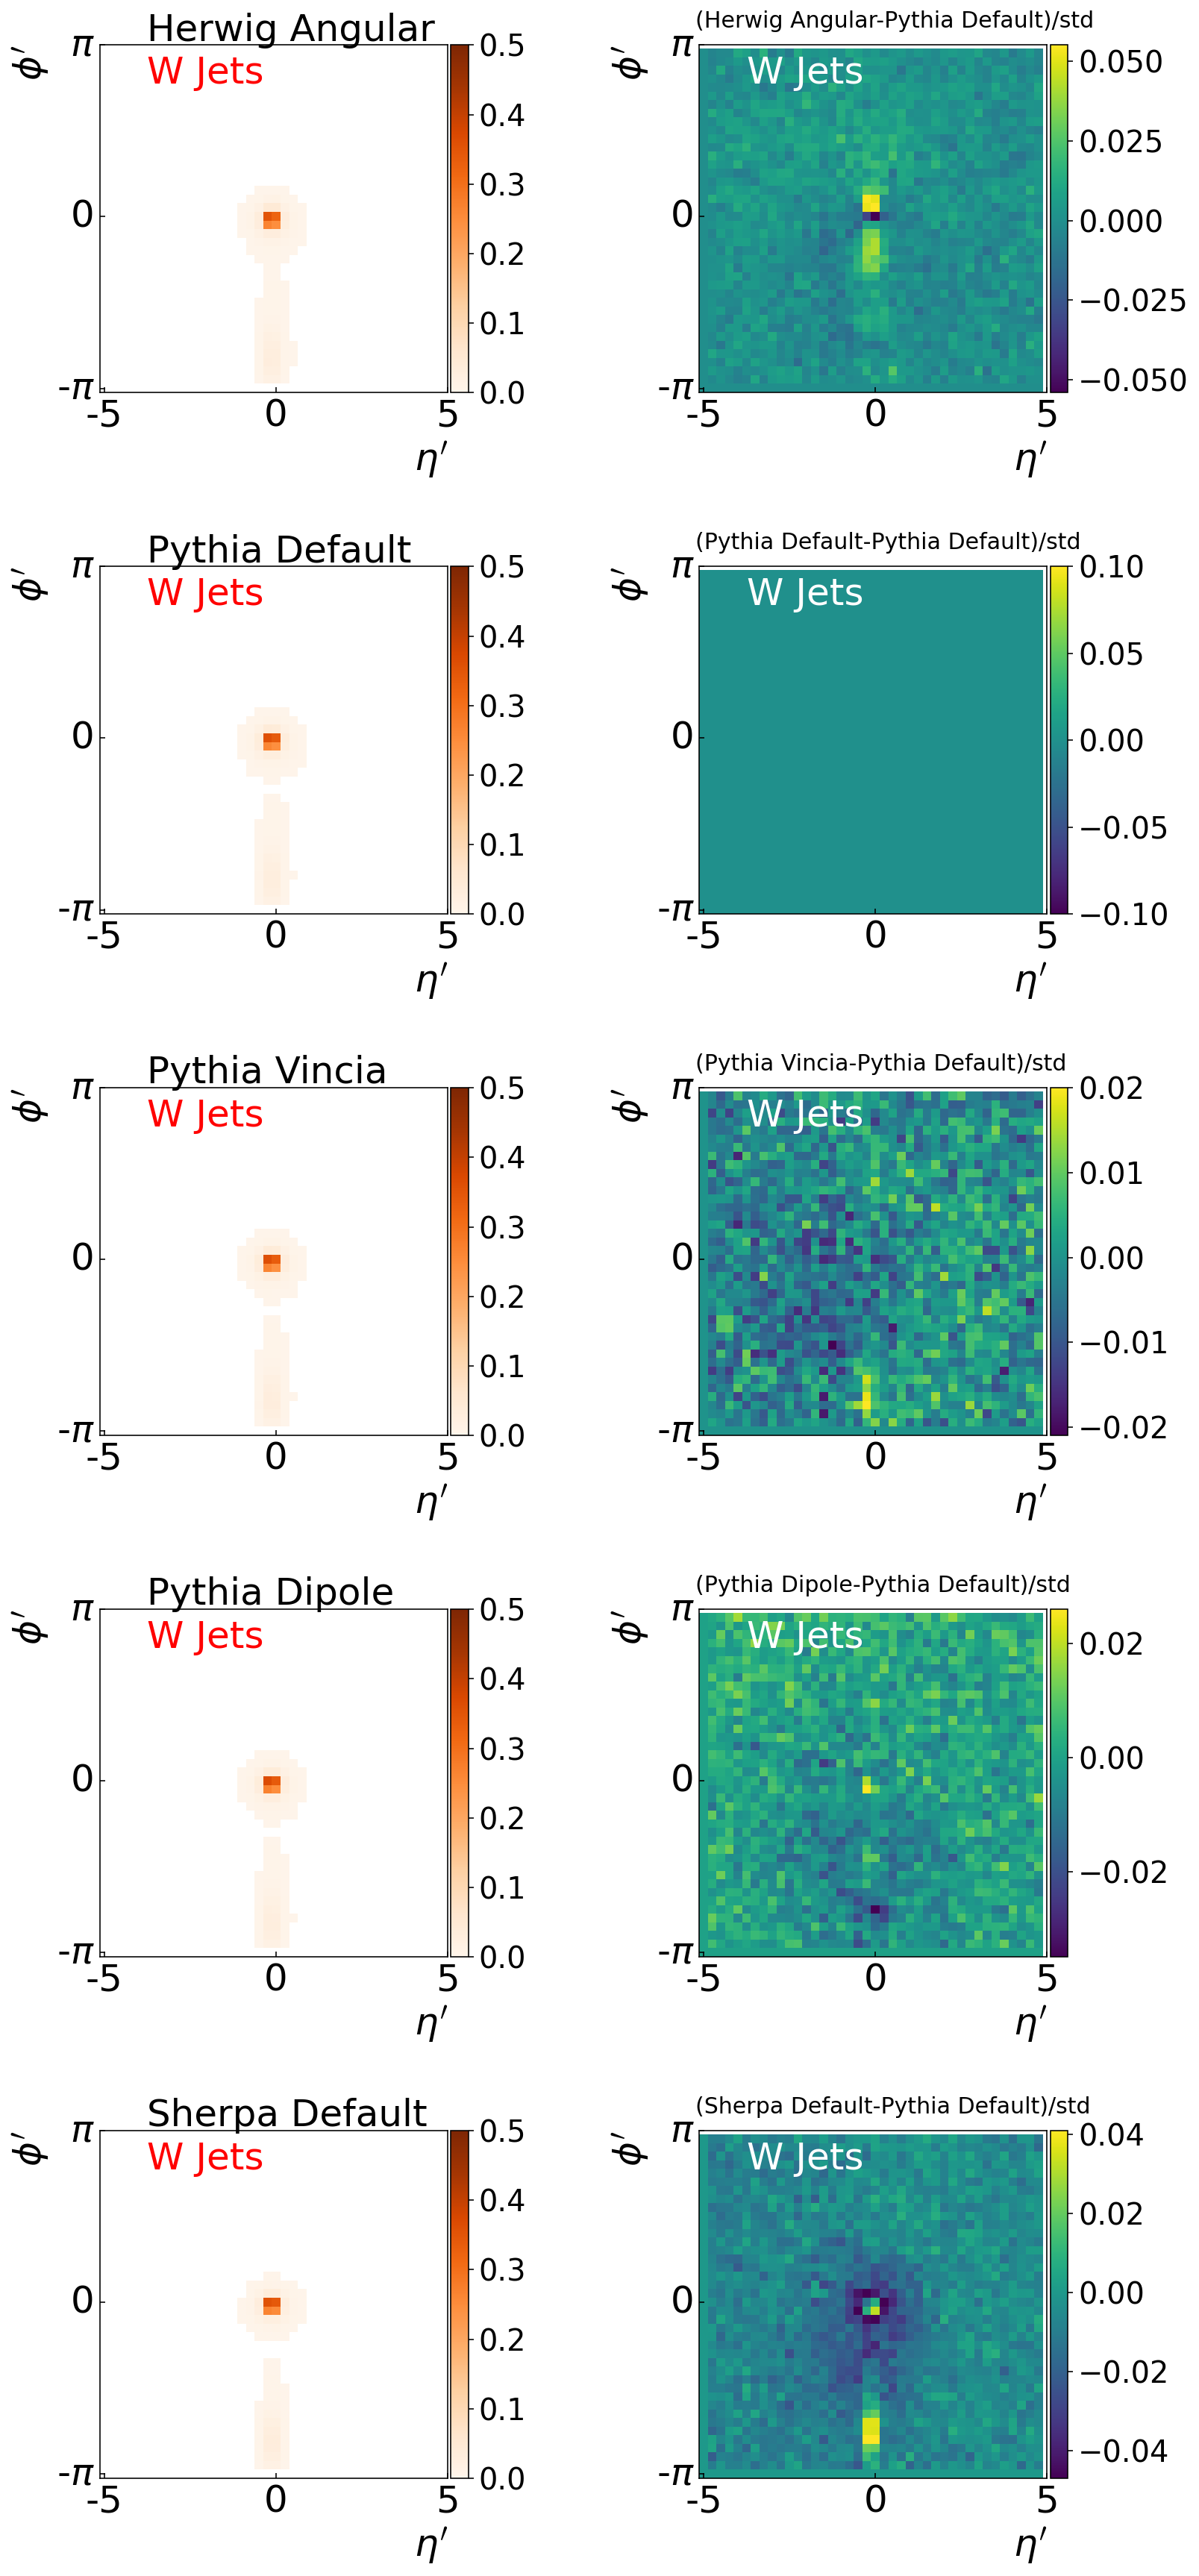

In [32]:
generator_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')

plt.figure(figsize=(12,30))
for index, element in enumerate(Wjet):

    plot_axis = plt.subplot(5,2,index+1)


    jetimage_average = sum(element)/len(element)

    if index%2 == 0: 
        aa = plot_axis.imshow(jetimage_average,vmin=0, 
#                               vmax=round(np.max(jetimage_average),3),
                              vmax=0.5,
                              cmap=newcmap, origin='lower')
#         aa = plot_axis.imshow(np.log10(np.maximum(1e-10, jetimage_average)),cmap=newcmap, origin='lower')
    
    elif index%2 == 1: 
        aa = plot_axis.imshow(jetimage_average,vmin=round(np.min(jetimage_average),3), vmax=round(np.max(jetimage_average),3),cmap="viridis", origin='lower')
#         aa = plot_axis.imshow(np.log10(np.maximum(1e-10, jetimage_average)),cmap="viridis", origin='lower')
        
    
    
    # plt.imshow(jetimage_average,vmin=0, vmax=round(np.max(jetimage_average),3),cmap=newcmap)
    plot_axis.set_yticks([0,20,40])
    # ax2.set_yticks([20,25,30])
    plot_axis.set_yticklabels(["","",""], fontsize=25, rotation=0)
    plot_axis.tick_params(axis='y', direction="in")

    plot_axis.set_xticks([0,20,40])
    # plot_axis.set_xticks([20,25,30])
    plot_axis.set_xticklabels(["-5","0","5"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
    plot_axis.set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
    plot_axis.tick_params(axis='x', direction="in")


    plot_axis.set_yticks([0,20,40])
    # plot_axis.set_yticks([20,25,30])
    plot_axis.set_yticklabels(["-$\pi$","0","$\pi$"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
    plot_axis.set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)

#     # plot_axis.text(x=3,y=4, s=element, rotation=0 ,fontsize=25)
#     # plot_axis.text(x=3,y=38, s="p(" + element + ") > 0.9", rotation=0 ,fontsize=25)

    divider = make_axes_locatable(plot_axis)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(aa, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    # plot_axis.set_xlim(20,30)
    # plot_axis.set_ylim(20,30)
    
    if index%2 == 0: 
        plot_axis.text(x=5, y=35.5, s="W Jets",c="r",fontsize=25)
        plot_axis.text(x=5, y=40.5, s=str(generator_name[int(index/2)]),fontsize=25)
    if index%2 == 1: 
        plot_axis.text(x=5, y=35.5, s="W Jets",c="w",fontsize=25)
        plot_axis.text(x=-1, y=42, s="("+str(generator_name[int(index/2)])+"-Pythia Default)/std",fontsize=15)
#     elif index%2 == 1:
#         plot_axis.text(x=5, y=35.5, s="QCD Jets",c="r",fontsize=25)
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [16]:
ticks_1 = time.time()


QCDjet = [QCD_jet[0],(QCD_jet[0]-QCD_jet[1])/(np.std(np.concatenate((np.array(QCD_jet[0]),np.array(QCD_jet[1]))), axis=0)+1e-5),
       QCD_jet[1],(QCD_jet[1]-QCD_jet[1]),
       QCD_jet[2],(QCD_jet[2]-QCD_jet[1])/(np.std(np.concatenate((np.array(QCD_jet[2]),np.array(QCD_jet[1]))), axis=0)+1e-5),
       QCD_jet[3],(QCD_jet[3]-QCD_jet[1])/(np.std(np.concatenate((np.array(QCD_jet[3]),np.array(QCD_jet[1]))), axis=0)+1e-5),
       QCD_jet[4],(QCD_jet[4]-QCD_jet[1])/(np.std(np.concatenate((np.array(QCD_jet[4]),np.array(QCD_jet[1]))), axis=0)+1e-5)
      ]

ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))



Time Cost : 0.4699 min


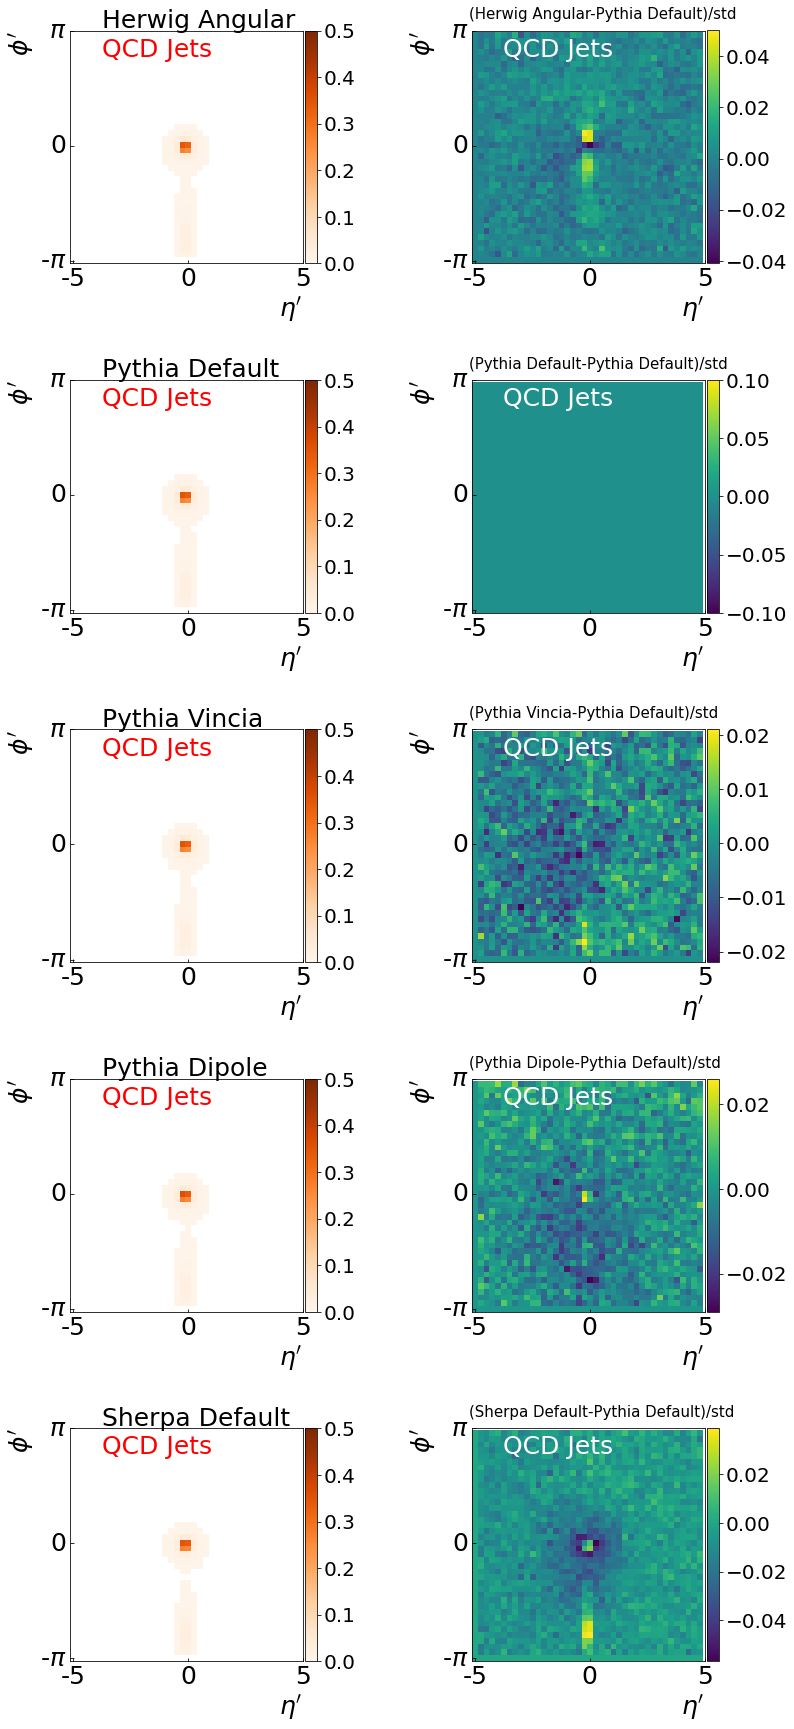

In [23]:
generator_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')


plt.figure(figsize=(12,30))
for index, element in enumerate(QCDjet):
    plot_axis = plt.subplot(5,2,index+1)


    jetimage_average = sum(element)/len(element)

    if index%2 == 0: 
        aa = plot_axis.imshow(jetimage_average,vmin=0, 
#                               vmax=round(np.max(jetimage_average),3),
                              vmax=0.5,
                              cmap=newcmap, origin='lower')
#         aa = plot_axis.imshow(np.log10(np.maximum(1e-10, jetimage_average)),cmap=newcmap, origin='lower')
    
    elif index%2 == 1: 
        aa = plot_axis.imshow(jetimage_average,vmin=round(np.min(jetimage_average),3), vmax=round(np.max(jetimage_average),3),cmap="viridis", origin='lower')
#         aa = plot_axis.imshow(np.log10(np.maximum(1e-10, jetimage_average)),cmap="viridis", origin='lower')
        
    
    
    # plt.imshow(jetimage_average,vmin=0, vmax=round(np.max(jetimage_average),3),cmap=newcmap)
    plot_axis.set_yticks([0,20,40])
    # ax2.set_yticks([20,25,30])
    plot_axis.set_yticklabels(["","",""], fontsize=25, rotation=0)
    plot_axis.tick_params(axis='y', direction="in")

    plot_axis.set_xticks([0,20,40])
    # plot_axis.set_xticks([20,25,30])
    plot_axis.set_xticklabels(["-5","0","5"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
    plot_axis.set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
    plot_axis.tick_params(axis='x', direction="in")


    plot_axis.set_yticks([0,20,40])
    # plot_axis.set_yticks([20,25,30])
    plot_axis.set_yticklabels(["-$\pi$","0","$\pi$"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
    plot_axis.set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)

#     # plot_axis.text(x=3,y=4, s=element, rotation=0 ,fontsize=25)
#     # plot_axis.text(x=3,y=38, s="p(" + element + ") > 0.9", rotation=0 ,fontsize=25)

    divider = make_axes_locatable(plot_axis)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(aa, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    # plot_axis.set_xlim(20,30)
    # plot_axis.set_ylim(20,30)
    
    if index%2 == 0: 
        plot_axis.text(x=5, y=35.5, s="QCD Jets",c="r",fontsize=25)
        plot_axis.text(x=5, y=40.5, s=str(generator_name[int(index/2)]),fontsize=25)
    if index%2 == 1: 
        plot_axis.text(x=5, y=35.5, s="QCD Jets",c="w",fontsize=25)
        plot_axis.text(x=-1, y=42, s="("+str(generator_name[int(index/2)])+"-Pythia Default)/std",fontsize=15)
#     elif index%2 == 1:
#         plot_axis.text(x=5, y=35.5, s="QCD Jets",c="r",fontsize=25)
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [35]:
ticks_1 = time.time()

# Comparejet = [(QCD_jet[0]-W_jet[0])/(np.std(np.concatenate((np.array(QCD_jet[0]),np.array(W_jet[0]))), axis=0)+1e-5),
#        (QCD_jet[1]-W_jet[1])/(np.std(np.concatenate((np.array(QCD_jet[1]),np.array(W_jet[1]))), axis=0)+1e-5),
#        (QCD_jet[2]-W_jet[2])/(np.std(np.concatenate((np.array(QCD_jet[2]),np.array(W_jet[2]))), axis=0)+1e-5),
#        (QCD_jet[3]-W_jet[3])/(np.std(np.concatenate((np.array(QCD_jet[3]),np.array(W_jet[3]))), axis=0)+1e-5),
#        (QCD_jet[4]-W_jet[4])/(np.std(np.concatenate((np.array(QCD_jet[4]),np.array(W_jet[4]))), axis=0)+1e-5)
#       ]


Comparejet = [(QCD_jet[0]-W_jet[0])/(np.std(np.array(QCD_jet[0]-W_jet[0]), axis=0)+1e-5),
       (QCD_jet[1]-W_jet[1])/(np.std(np.array(QCD_jet[1]-W_jet[1]), axis=0)+1e-5),
       (QCD_jet[2]-W_jet[2])/(np.std(np.array(QCD_jet[2]-W_jet[2]), axis=0)+1e-5),
       (QCD_jet[3]-W_jet[3])/(np.std(np.array(QCD_jet[3]-W_jet[3]), axis=0)+1e-5),
       (QCD_jet[4]-W_jet[4])/(np.std(np.array(QCD_jet[4]-W_jet[4]), axis=0)+1e-5)
      ]




ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))



Time Cost : 0.2834 min


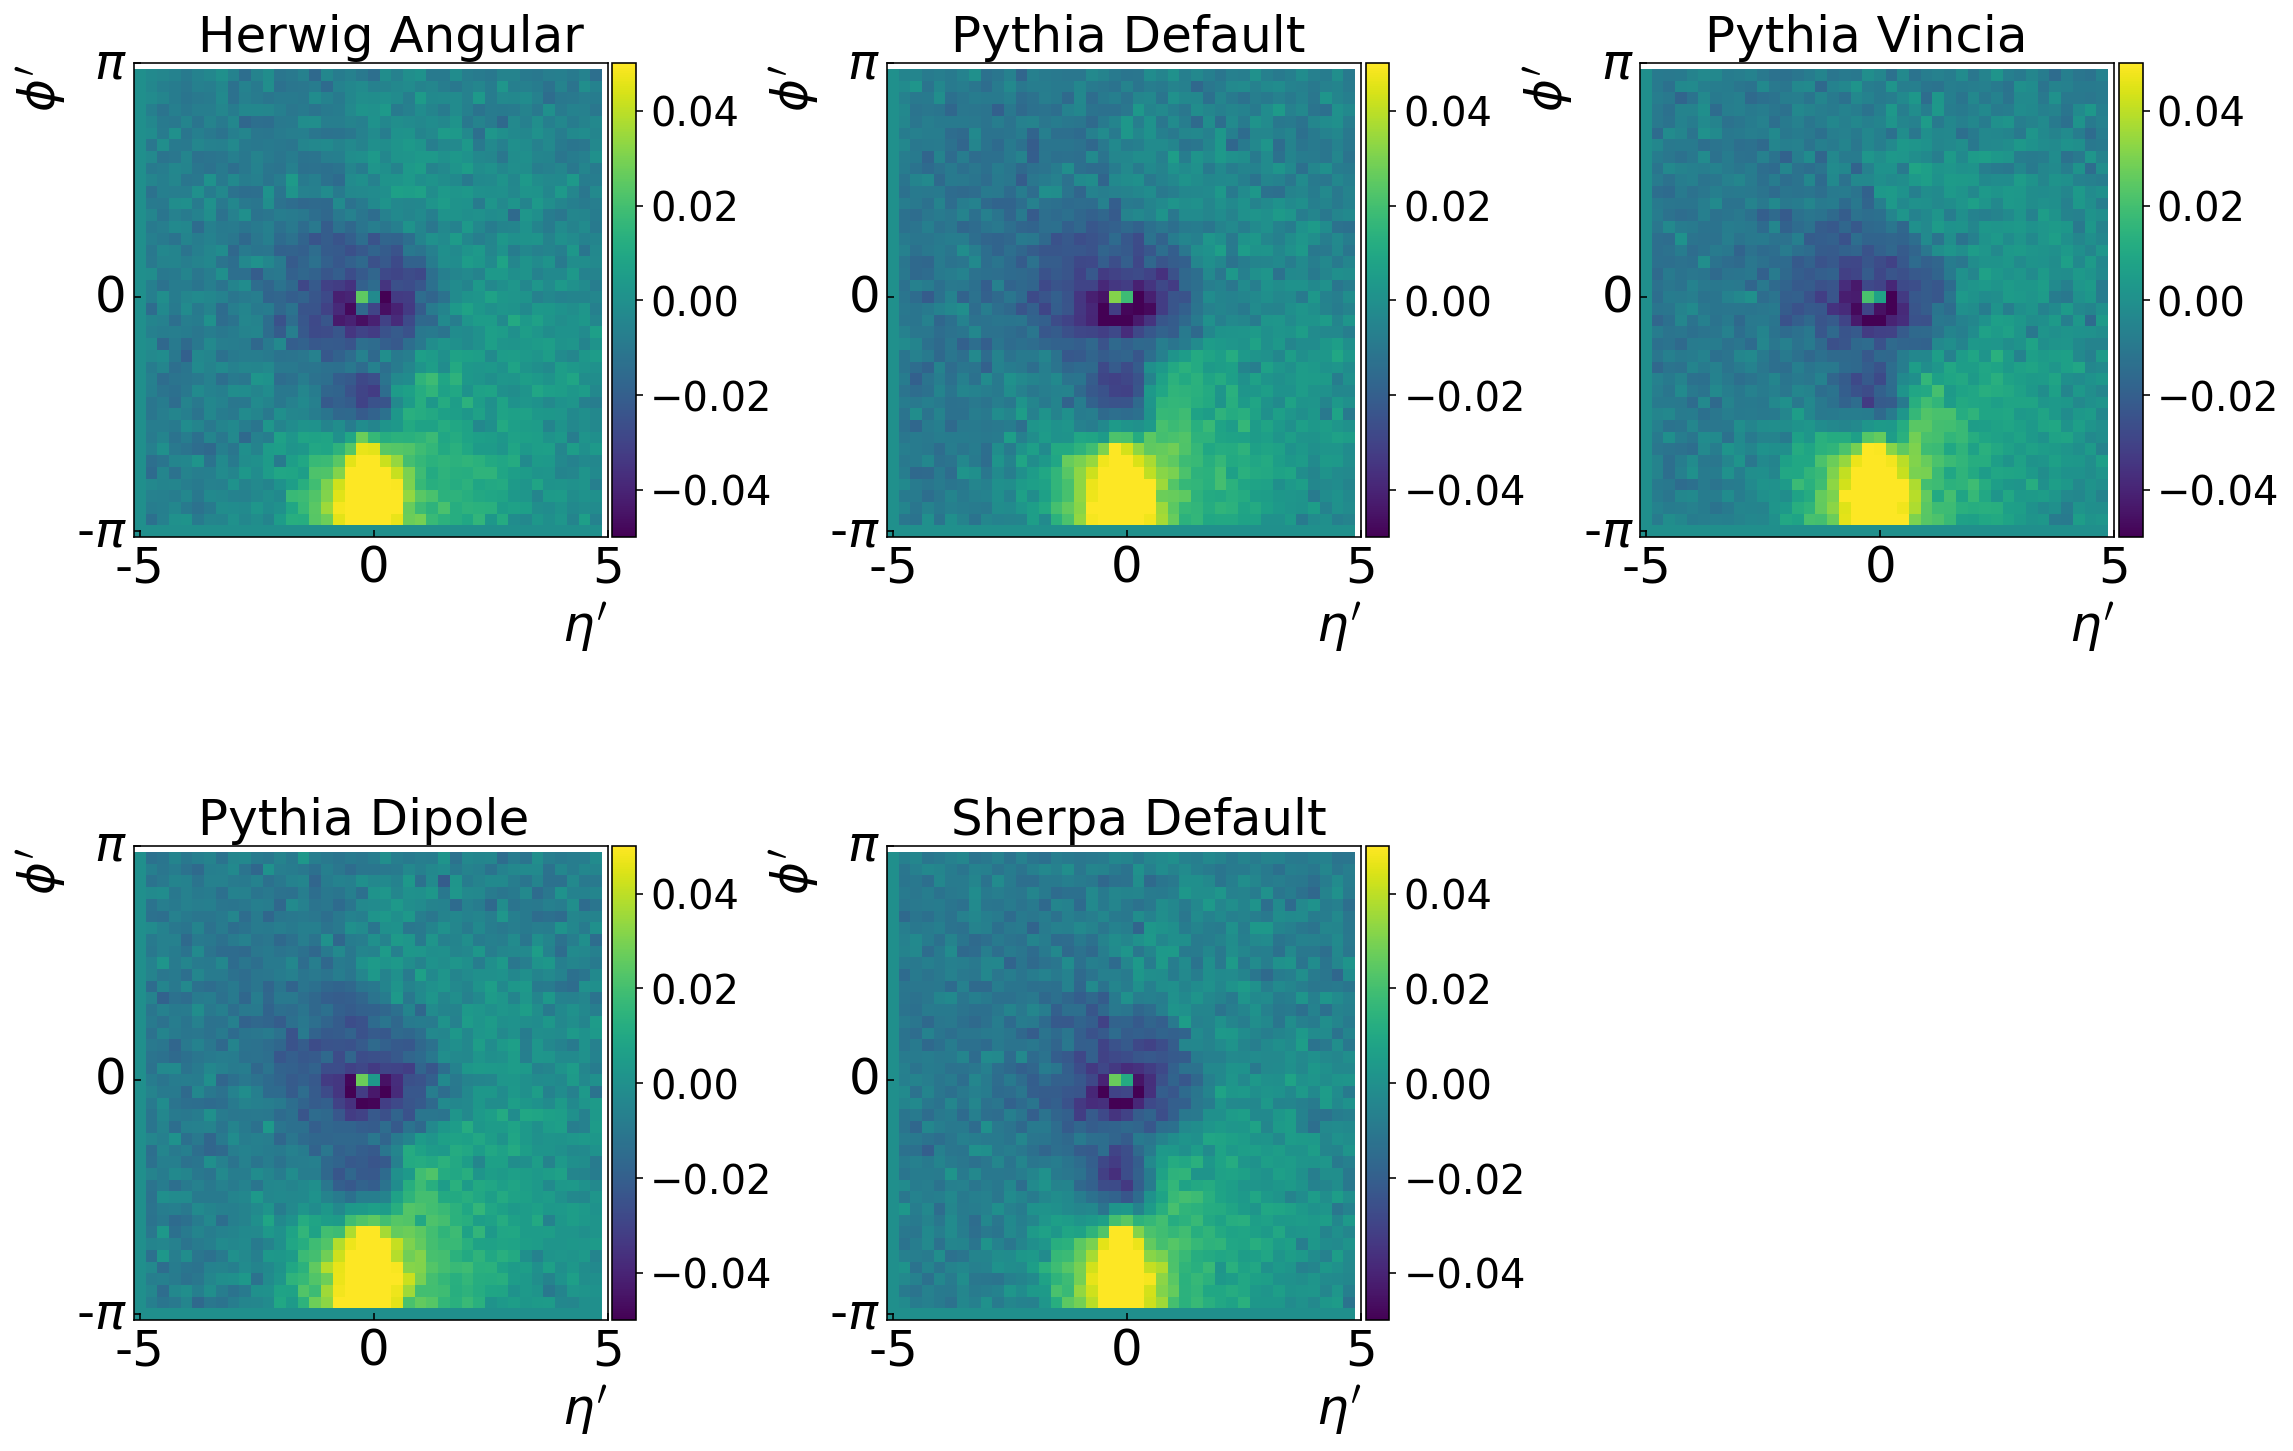

In [36]:
generator_name = ["Herwig Angular", "Pythia Default", "Pythia Vincia", "Pythia Dipole", "Sherpa Default"]

Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')

plt.figure(figsize=(18,12))
for index, element in enumerate(Comparejet):
    plot_axis = plt.subplot(2,3,index+1)


    jetimage_average = sum(element)/len(element)
    
    aa = plot_axis.imshow(-1*jetimage_average,vmin=round(np.min(-1*jetimage_average),3), vmax=round(np.max(-1*jetimage_average),3),cmap="viridis", origin='lower')
    aa = plot_axis.imshow(-1*jetimage_average,vmin=-0.05, vmax=0.05,cmap="viridis", origin='lower')
#     aa = plot_axis.imshow(jetimage_average,vmin=0, vmax=round(np.max(jetimage_average),3),cmap=newcmap, origin='lower')
#     aa = plot_axis.imshow(np.log10(np.maximum(1e-10, jetimage_average)),cmap="viridis", origin='lower')
#     aa = plot_axis.imshow(np.log10(np.maximum(1e-10, jetimage_average)),cmap=newcmap, origin='lower')

    
    plot_axis.set_yticks([0,20,40])
    # ax2.set_yticks([20,25,30])
    plot_axis.set_yticklabels(["","",""], fontsize=25, rotation=0)
    plot_axis.tick_params(axis='y', direction="in")

    plot_axis.set_xticks([0,20,40])
    # plot_axis.set_xticks([20,25,30])
    plot_axis.set_xticklabels(["-5","0","5"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
    plot_axis.set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
    plot_axis.tick_params(axis='x', direction="in")


    plot_axis.set_yticks([0,20,40])
    # plot_axis.set_yticks([20,25,30])
    plot_axis.set_yticklabels(["-$\pi$","0","$\pi$"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
    plot_axis.set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)

#     # plot_axis.text(x=3,y=4, s=element, rotation=0 ,fontsize=25)
#     # plot_axis.text(x=3,y=38, s="p(" + element + ") > 0.9", rotation=0 ,fontsize=25)

    divider = make_axes_locatable(plot_axis)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(aa, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    # plot_axis.set_xlim(20,30)
    # plot_axis.set_ylim(20,30)
    plot_axis.text(x=5, y=41, s=str(generator_name[int(index)]),fontsize=25)
#     plot_axis.text(x=2, y=35.5, s="(W Jets - QCD jets)/std",c="w",fontsize=25)
#     elif index%2 == 1:
#         plot_axis.text(x=5, y=35.5, s="QCD Jets",c="r",fontsize=25)
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()